IMPORT LIBRARY


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import warnings
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

UPLOAD DATASET

In [ ]:
df = pd.read_excel("https://drive.google.com/uc?export=download&id"+"=1glONYsbbwSvnHzPo-UG2UXAzcTCVcGjw")
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode dan teknologi terkini ...,Mahasiswa mampu mendesain dan mengimplementasi...,PLO11-CPMK1
1,2,NaN,Mampu menerapkan metode dan teknologi terkini ...,Mahasiswa mampu mendesain dan mengimplementasi...,PLO11-CPMK2
2,3,NaN,Mampu membangun sistem cerdas pada platform te...,Mahasiswa mampu mengintegrasikan teknologi mul...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan secara tepat dalam k...,Mahasiswa mampu menganalisis solusi-solusi tek...,PLO9-CLO1
4,5,NaN,Mampu mengambil keputusan secara tepat dalam k...,Mahasiswa mampu mengkombinasikan berbagai pers...,PLO9-CLO2
...,...,...,...,...,...
203,204,NaN,Mampu mengidentifikasi masalah dan merumuskan ...,Mahasiswa dapat menjelaskan solusi terbaik yan...,PLO12-CLO3
204,205,NaN,Mampu mengidentifikasi masalah dan merumuskan ...,Mahasiswa dapat menerapkan pemrograman paralle...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas pada platform te...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,NaN,Mampu membangun sistem cerdas pada platform te...,Mahasiswa mampu membedakan berbagai teknik Pen...,PLO10-CLO2


PREPROCESSING


In [ ]:
#cek duplikat
df.duplicated().sum()

0

In [ ]:
#menghapus spasi
df['CPL'] = df['CPL'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
# Konfirmasi jumlah CPL unik
unique_cpls = df['CPL'].unique()
print("CPL unik:", len(unique_cpls))

CPL unik: 12


In [ ]:
# Replace NaN values in 'Kode_MK' with an empty string
df['Kode_MK'] = df['Kode_MK'].apply(lambda x: x if isinstance(x, str) else '')
df

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode dan teknologi terkini ...,Mahasiswa mampu mendesain dan mengimplementasi...,PLO11-CPMK1
1,2,,Mampu menerapkan metode dan teknologi terkini ...,Mahasiswa mampu mendesain dan mengimplementasi...,PLO11-CPMK2
2,3,,Mampu membangun sistem cerdas pada platform te...,Mahasiswa mampu mengintegrasikan teknologi mul...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan secara tepat dalam k...,Mahasiswa mampu menganalisis solusi-solusi tek...,PLO9-CLO1
4,5,,Mampu mengambil keputusan secara tepat dalam k...,Mahasiswa mampu mengkombinasikan berbagai pers...,PLO9-CLO2
...,...,...,...,...,...
203,204,,Mampu mengidentifikasi masalah dan merumuskan ...,Mahasiswa dapat menjelaskan solusi terbaik yan...,PLO12-CLO3
204,205,,Mampu mengidentifikasi masalah dan merumuskan ...,Mahasiswa dapat menerapkan pemrograman paralle...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas pada platform te...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,Mampu membangun sistem cerdas pada platform te...,Mahasiswa mampu membedakan berbagai teknik Pen...,PLO10-CLO2


TF-IDF


In [ ]:
#Copy dataset
df_tfidf = df.copy()

In [ ]:
#remove stopwords cpl
stop_words_indo = set(stopwords.words('indonesian'))
stop_words_eng = set(stopwords.words('english'))
stop_words = stop_words_indo.union(stop_words_eng)
df_tfidf['CPL'] =df_tfidf['CPL'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_tfidf

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mampu mendesain dan mengimplementasi...,PLO11-CPMK1
1,2,,Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mampu mendesain dan mengimplementasi...,PLO11-CPMK2
2,3,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa mampu mengintegrasikan teknologi mul...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mampu menganalisis solusi-solusi tek...,PLO9-CLO1
4,5,,Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mampu mengkombinasikan berbagai pers...,PLO9-CLO2
...,...,...,...,...,...
203,204,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa dapat menjelaskan solusi terbaik yan...,PLO12-CLO3
204,205,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa dapat menerapkan pemrograman paralle...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas platform tertent...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa mampu membedakan berbagai teknik Pen...,PLO10-CLO2


In [ ]:
#remove stopwords cpmk
stop_words_indo = set(stopwords.words('indonesian'))
stop_words_eng = set(stopwords.words('english'))
stop_words = stop_words_indo.union(stop_words_eng)
df_tfidf['CPMK'] =df_tfidf['CPMK'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_tfidf

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa mengintegrasikan teknologi multi-pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa menganalisis solusi-solusi teknologi...,PLO9-CLO1
4,5,,Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas platform tertent...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa membedakan teknik Pengujian Perangka...,PLO10-CLO2


In [ ]:
#remove punctuation cpl
pattern = r'[^\w\s]'
df_tfidf['CPL'] = df_tfidf['CPL'].replace(pattern, ' ', regex=True)
df_tfidf

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa mengintegrasikan teknologi multi-pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa menganalisis solusi-solusi teknologi...,PLO9-CLO1
4,5,,Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas platform tertent...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa membedakan teknik Pengujian Perangka...,PLO10-CLO2


In [ ]:
#remove punctuation cpmk
pattern = r'[^\w\s]'
df_tfidf['CPMK'] = df_tfidf['CPMK'].replace(pattern, ' ', regex=True)
df_tfidf

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,Mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,Mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,Mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,Mampu membangun sistem cerdas platform tertent...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,Mampu membangun sistem cerdas platform tertent...,Mahasiswa membedakan teknik Pengujian Perangka...,PLO10-CLO2


In [ ]:
#lowercasing cpl
df_tfidf['CPL'] =df_tfidf['CPL'].str.lower()
df_tfidf

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,mampu menerapkan metode teknologi terkini mend...,Mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,mampu membangun sistem cerdas platform tertent...,Mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),mampu mengambil keputusan konteks penyelesaian...,Mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,mampu mengambil keputusan konteks penyelesaian...,Mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,mampu mengidentifikasi merumuskan solusi kompu...,Mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,mampu membangun sistem cerdas platform tertent...,Mahasiswa memahami konsep Kualitas perangkat l...,PLO10-CLO1
206,207,,mampu membangun sistem cerdas platform tertent...,Mahasiswa membedakan teknik Pengujian Perangka...,PLO10-CLO2


In [ ]:
#lowercasing cpmk
df_tfidf['CPMK'] = df_tfidf['CPMK'].str.lower()
df_tfidf

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,mampu membangun sistem cerdas platform tertent...,mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),mampu mengambil keputusan konteks penyelesaian...,mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,mampu mengambil keputusan konteks penyelesaian...,mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,mampu membangun sistem cerdas platform tertent...,mahasiswa memahami konsep kualitas perangkat l...,PLO10-CLO1
206,207,,mampu membangun sistem cerdas platform tertent...,mahasiswa membedakan teknik pengujian perangka...,PLO10-CLO2


In [ ]:
def remove_double_and_digits(text):
    # Menghapus huruf double
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    # Menghapus angka
    text = re.sub(r'\d', '', text)
    return text

# Terapkan fungsi remove
df_tfidf["CPL"] = df_tfidf["CPL"].apply(remove_double_and_digits)
df_tfidf

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,mampu membangun sistem cerdas platform tertent...,mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),mampu mengambil keputusan konteks penyelesaian...,mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,mampu mengambil keputusan konteks penyelesaian...,mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,mampu membangun sistem cerdas platform tertent...,mahasiswa memahami konsep kualitas perangkat l...,PLO10-CLO1
206,207,,mampu membangun sistem cerdas platform tertent...,mahasiswa membedakan teknik pengujian perangka...,PLO10-CLO2


In [ ]:
def remove_double_and_digits(text):
    # Menghapus huruf double
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    # Menghapus angka
    text = re.sub(r'\d', '', text)
    return text

# Terapkan fungsi remove
df_tfidf["CPMK"] = df_tfidf["CPMK"].apply(remove_double_and_digits)
df_tfidf

,No,Kode_MK,CPL,CPMK,Ket
0,1,ABP (CII3H4),mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK1
1,2,,mampu menerapkan metode teknologi terkini mend...,mahasiswa mendesain mengimplementasikan teknol...,PLO11-CPMK2
2,3,,mampu membangun sistem cerdas platform tertent...,mahasiswa mengintegrasikan teknologi multi pla...,PLO10-CPMK 3
3,4,SOSIO (CII3K2),mampu mengambil keputusan konteks penyelesaian...,mahasiswa menganalisis solusi solusi teknologi...,PLO9-CLO1
4,5,,mampu mengambil keputusan konteks penyelesaian...,mahasiswa mengkombinasikan perspektif disiplin...,PLO9-CLO2
...,...,...,...,...,...
203,204,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa solusi terbaik dibutuhkan menyeliesa...,PLO12-CLO3
204,205,,mampu mengidentifikasi merumuskan solusi kompu...,mahasiswa menerapkan pemrograman parallel akse...,PLO12-CLO4
205,206,Verifikasi dan Validasi PL,mampu membangun sistem cerdas platform tertent...,mahasiswa memahami konsep kualitas perangkat l...,PLO10-CLO1
206,207,,mampu membangun sistem cerdas platform tertent...,mahasiswa membedakan teknik pengujian perangka...,PLO10-CLO2


In [ ]:
# Buat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming
def stem_text_sastrawi(text):
    words = text.split()
    lemmas = [stemmer.stem(word) for word in words]
    return ' '.join(lemmas)
# Contoh penggunaan
kalimat = "Saya sedang belajar bahasa Indonesia dan saya sangat senang"
kata_dasar = stem_text_sastrawi(kalimat)
print(kata_dasar)


saya sedang ajar bahasa indonesia dan saya sangat senang


In [ ]:
# Terapkan lemmatization pada kolom CPL
df_tfidf['CPL'] = df_tfidf['CPL'].apply(stem_text_sastrawi)

# Terapkan lemmatization pada kolom CPMK
df_tfidf['CPMK'] = df_tfidf['CPMK'].apply(stem_text_sastrawi)

In [ ]:
# Menggabungkan semua deskripsi CPL unik menjadi satu dokumen (untuk global TF-IDF) dan membuat vectorizer
cpl_docs_tfidf = df_tfidf.groupby('CPL')['CPL'].first().tolist()
cpmk_docs_tfidf = df_tfidf.groupby('CPMK')['CPMK'].first().tolist()
docs_tfidf = cpl_docs_tfidf + cpmk_docs_tfidf
tfidf_vectorizer = TfidfVectorizer(
     max_df = 0.8,
     min_df = 5,
     ngram_range=(1,2)
)
tfidf_matrix = tfidf_vectorizer.fit_transform(docs_tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_feature_names

array(['ajar', 'algoritma', 'algoritmik', 'aman', 'ambil', 'analis',
       'analis desain', 'analisis', 'aplikasi', 'aplikasi analis',
       'aplikasi konsep', 'aspek', 'bahasa', 'baik', 'basis', 'benar',
       'bentuk', 'beri', 'beri rekomendasi', 'bidang', 'business',
       'business plan', 'butuh', 'cerdas', 'citra', 'computing', 'dasar',
       'data', 'definisi', 'dekat', 'desain', 'desain implementasi',
       'deskripsi', 'digital', 'erti', 'evaluasi', 'fungsi', 'giat',
       'guna', 'hasil', 'hidup', 'hitung', 'identifikasi', 'ilmiah',
       'ilmu', 'implementasi', 'informatika', 'interaksi', 'isu', 'jelas',
       'jelas aplikasi', 'kait', 'kalimat', 'kembang', 'komputasi',
       'komunikasi', 'konsep', 'konsep dasar', 'konsep konsep',
       'learning', 'lunak', 'mahasiswa', 'mahasiswa analis',
       'mahasiswa definisi', 'mahasiswa desain', 'mahasiswa implementasi',
       'mahasiswa jelas', 'mahasiswa konsep', 'mahasiswa milik',
       'mahasiswa paham', 'mampu', 'm

In [ ]:
# Konversi tfidf_matrix menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

# Tampilkan DataFrame yang berisi hasil TF-IDF
tfidf_df

,ajar,algoritma,algoritmik,aman,ambil,analis,analis desain,analisis,aplikasi,aplikasi analis,...,tentu,teori,tepat,terap,terap metode,tingkat,tulis,uji,utama,visualisasi
0,0.0,0.0,0.0,0.000000,0.407704,0.0,0.0,0.371817,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.423544,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.285817,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.277245,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.636130,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.425334,0.0,0.0,0.000000,0.0,0.0,0.0
216,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.365423,0.0,0.0,0.000000,0.0,0.0,0.0
217,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.628209,0.0,0.0,0.0
218,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
cosine_similarities_tfidf = []
for _, row in  df_tfidf.iterrows():
    # Transform teks CPL dan CPMK pada baris ini
    cpl_vector = tfidf_vectorizer.transform([row['CPL']])
    cpmk_vector = tfidf_vectorizer.transform([row['CPMK']])

    # Hitung cosine similarity
    cosine_sim_tfidf = cosine_similarity(cpl_vector, cpmk_vector)[0][0]
    cosine_similarities_tfidf.append(cosine_sim_tfidf)

# Tambahkan hasil ke kolom baru pada DataFrame
df_tfidf['hasil_cosine_tfidf'] = cosine_similarities_tfidf
df_tfidf
df_tfidf.to_excel("hasil_tfidf.xlsx", index=False)

In [ ]:
#describe cosine tfidf
df_tfidf["hasil_cosine_tfidf"].describe()

,hasil_cosine_tfidf
count,208.000000
mean,0.057283
std,0.091983
min,0.000000
25%,0.000000
50%,0.020862
75%,0.080179
max,0.733785


In [ ]:
# Setelah menghitung semua cosine similarity, kita bisa menghitung threshold
min_value = min(cosine_similarities_tfidf)
max_value = max(cosine_similarities_tfidf)
threshold = (min_value + max_value) / 2

# Terapkan threshold: ubah nilai menjadi 1 jika >= threshold, 0 jika < threshold
binary_results = [1 if sim >= threshold else 0 for sim in cosine_similarities_tfidf]
print("min: ", min_value)
print("max:", max_value)
print(threshold)

min:  0.0
max: 0.5468272432759995
0.27341362163799976


In [ ]:
# Evaluasi akurasi berdasarkan similarity >= 0.2
# Dianggap akurat jika nilai similarity >= 0.2
is_accurate =  df_tfidf["hasil_cosine_tfidf"].apply(lambda x: 1 if x >= threshold else 0)
print(is_accurate)
df_tfidf['binary_tfidf'] = is_accurate
df_tfidf.to_excel("hasil_tfidf.xlsx", index=False)

0      0
1      0
2      0
3      0
4      0
      ..
203    0
204    0
205    1
206    1
207    1
Name: hasil_cosine_tfidf, Length: 208, dtype: int64


In [ ]:
# Hitung akurasi total (bukan per CPMK)
total_accuracy_tfidf = is_accurate.values.sum() / is_accurate.size
print("\nTotal Accuracy:", total_accuracy_tfidf)


Total Accuracy: 0.14423076923076922


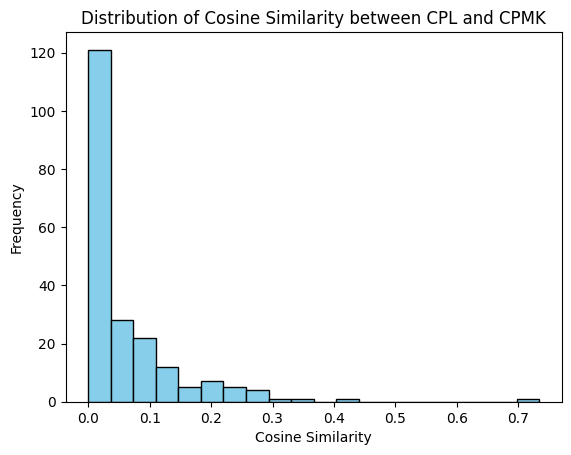

In [ ]:
# Visualisasi distribusi cosine similarity tfidf
import matplotlib.pyplot as plt
plt.hist(df_tfidf['hasil_cosine_tfidf'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Distribution of Cosine Similarity between CPL and CPMK")
plt.show()

FASTTEXT


In [ ]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296228 sha256=a62f1efed930f7a5eebd218810633d26e1db308d8dde7df43b4255acab746025
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
import fasttext
import fasttext.util

In [ ]:
# Download model pra-latih untuk bahasa Indonesia
fasttext.util.download_model('id', if_exists='ignore')  # model bahasa Indonesia
model = fasttext.load_model('cc.id.300.bin')  # Load model n-gram bahasa Indonesia

In [ ]:
df_fasttext = df.copy()

In [ ]:
# Fungsi untuk mendapatkan vektor dari teks dengan n-grams
def get_vector(text):
    # Menghitung rata-rata vektor kata untuk teks
    words = text.split()
    vectors = [model.get_word_vector(word) for word in words if word in model]
    if len(vectors) == 0:  # Jika tidak ada kata yang valid
        return np.zeros(model.get_dimension())  # Kembalikan vektor nol dengan dimensi model
    return np.mean(vectors, axis=0)

In [ ]:
# Buat list untuk menyimpan hasil cosine similarity
cosine_similarities_fasttext = []

In [ ]:
# Hitung cosine similarity untuk setiap baris
for idx, row in df_fasttext.iterrows():
    cpl_text = row['CPL'] if pd.notnull(row['CPL']) else ''
    cpmk_text = row['CPMK'] if pd.notnull(row['CPMK']) else ''

    # Dapatkan vektor untuk CPL dan CPMK
    cpl_vector = get_vector(cpl_text)
    cpmk_vector = get_vector(cpmk_text)

    # Hitung cosine similarity
    cosine_sim_ft = cosine_similarity([cpl_vector], [cpmk_vector])[0][0]
    cosine_similarities_fasttext.append(cosine_sim_ft)

In [ ]:
# Tambahkan hasil cosine similarity ke DataFrame sebagai kolom baru
df_fasttext['hasil_cosine_ft'] = cosine_similarities_fasttext

# Tampilkan DataFrame hasilnya
df_fasttext

df_fasttext.to_excel("hasil_tf.xlsx",index=False)

In [ ]:
#describe cosine fasttext
df_fasttext["hasil_cosine_ft"].describe()

,hasil_cosine_ft
count,208.000000
mean,0.821377
std,0.072434
min,0.491872
25%,0.784872
50%,0.837811
75%,0.872298
max,0.927558


In [ ]:
# Setelah menghitung semua cosine similarity, kita bisa menghitung threshold
min_value = min(cosine_similarities_fasttext)
max_value = max(cosine_similarities_fasttext)
threshold = (min_value + max_value) / 2

# Terapkan threshold: ubah nilai menjadi 1 jika >= threshold, 0 jika < threshold
binary_results = [1 if sim >= threshold else 0 for sim in cosine_similarities_fasttext]
print("min: ", min_value)
print("max:", max_value)
print(threshold)

min:  0.49187195
max: 0.9275581
0.7097150087356567


In [ ]:
# Evaluasi akurasi berdasarkan similarity >= threshold
# Dianggap akurat jika nilai similarity >= threshold
is_accurate = df_fasttext["hasil_cosine_ft"].apply(lambda x: 1 if x >= threshold else 0)
print(is_accurate)
df_fasttext['binary_fasttext'] = is_accurate
df_fasttext.to_excel("hasil_fasttext.xlsx", index=False)

0      1
1      1
2      1
3      1
4      1
      ..
203    1
204    1
205    1
206    1
207    1
Name: hasil_cosine_ft, Length: 208, dtype: int64


In [ ]:
# Hitung akurasi total (bukan per CPMK)
total_accuracy_ft = is_accurate.values.sum() / is_accurate.size
print("\nTotal Accuracy:", total_accuracy_ft)


Total Accuracy: 0.9375


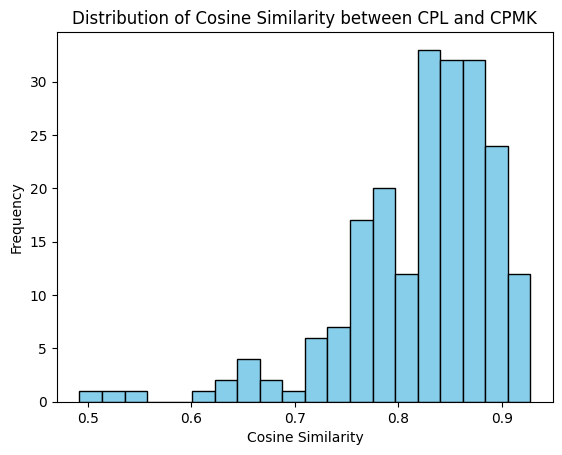

In [ ]:
# Visualisasi distribusi cosine similarity fasttext
import matplotlib.pyplot as plt
plt.hist(df_fasttext['hasil_cosine_ft'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Distribution of Cosine Similarity between CPL and CPMK")
plt.show()

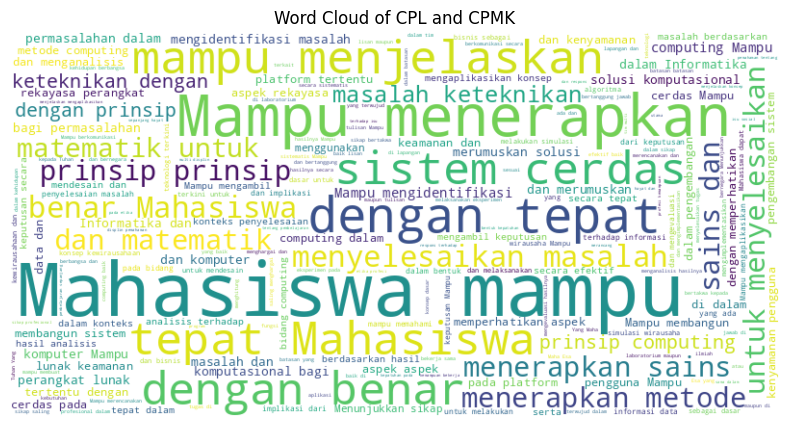

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua CPL dan CPMK menjadi satu teks
text = ' '.join(df['CPL'].tolist() + df['CPMK'].tolist())

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of CPL and CPMK')
plt.show()